In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,
                            confusion_matrix, 
                            classification_report)

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv("C:/Users/DELL/Downloads/archive (2)/dataset.csv")

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = pd.read_csv("C:/Users/DELL/Downloads/archive (2)/Symptom-severity.csv")

df1.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [7]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Hyperthyroidism,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,malaise,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [8]:
print(f"Length of dataset: {len(df)}")

print(f"\nNA values in dataset: \n{df.isna().sum()}")

print(f"\nPercentage NA values in dataset: \n{df.isna().sum()/len(df) * 100}")

Length of dataset: 4920

NA values in dataset: 
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Percentage NA values in dataset: 
Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [9]:
cols = df.columns
data = df[cols].values.flatten()
print(f"Shape: {data.shape}")
data

Shape: (88560,)


array(['Fungal infection', 'itching', ' skin_rash', ..., nan, nan, nan],
      dtype=object)

In [10]:
series_data = pd.Series(data)
series_data = series_data.str.strip()
series_data = series_data.values.reshape(df.shape)

df = pd.DataFrame(series_data, columns=df.columns)

df = df.fillna(0)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


In [11]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)


In [12]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [14]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)
    
    y_pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    
    sns.heatmap(df_cm, annot=True)

In [15]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy : {acc*100:.4f} %\n")
    print("Classification report: \n")
    print(report)
    

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
create_report(dt_model, X_test, y_test)

Accuracy : 99.4919 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        32
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        22
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        20
                   Cervical spondylosis       0.95      1.00      0.98        21
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00 

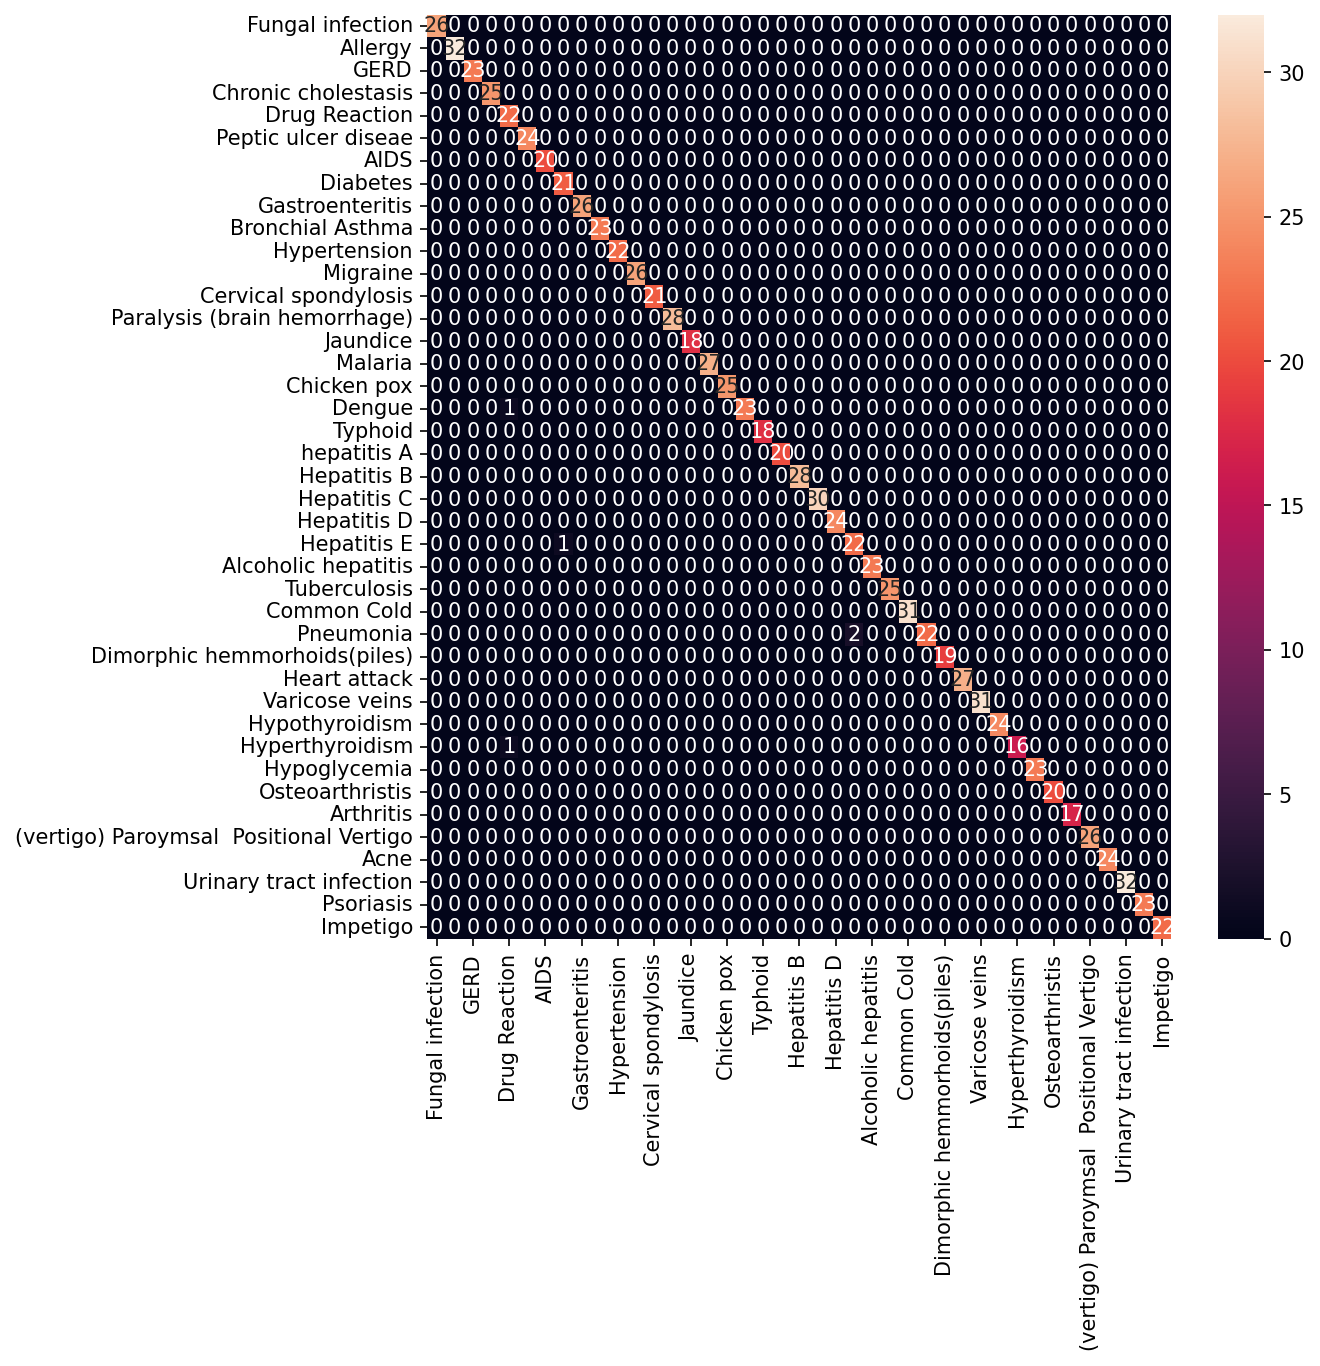

In [18]:
confusion_plot(dt_model, X_test, y_test)

In [19]:
#cross validation for DECISION TREE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' contains your features and 'labels' contains the corresponding labels

# Create a DecisionTreeClassifier model (replace this with your model
dt_model = DecisionTreeClassifier()
# Define the number of folds (k)
k = 20
kf = StratifiedKFold(n_splits=k)

# Perform cross-validation and calculate metrics
accuracy_scores = cross_val_score(dt_model, data, labels, scoring='accuracy', cv=kf)

# Additional metrics with manual calculation
precision_scores = [precision_score(labels[test], dt_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
recall_scores = [recall_score(labels[test], dt_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
f1_scores = [f1_score(labels[test], dt_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]

# Print the results
print("Accuracy:", np.mean(accuracy_scores) * 100)
print("Precision:", np.nanmean(precision_scores) * 100)  # Use np.nanmean to handle nan values
print("Recall:", np.nanmean(recall_scores) * 100)  # Use np.nanmean to handle nan values
print("F1 Score:", np.nanmean(f1_scores) * 100)  # Use np.nanmean to handle nan values


Accuracy: 99.51219512195122
Precision: 99.59639953542393
Recall: 99.51219512195122
F1 Score: 99.51739317592975


In [20]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score(dt_model,data,labels, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)
average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")


5-Fold Cross-Validation Scores:
[0.9949187  0.99288618 0.99186992 0.9949187  0.99796748]

Average Cross-Validation Accuracy: 99.45%


In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
create_report(rf_model, X_test, y_test)

Accuracy : 99.4919 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        32
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        22
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        20
                   Cervical spondylosis       0.95      1.00      0.98        21
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00 

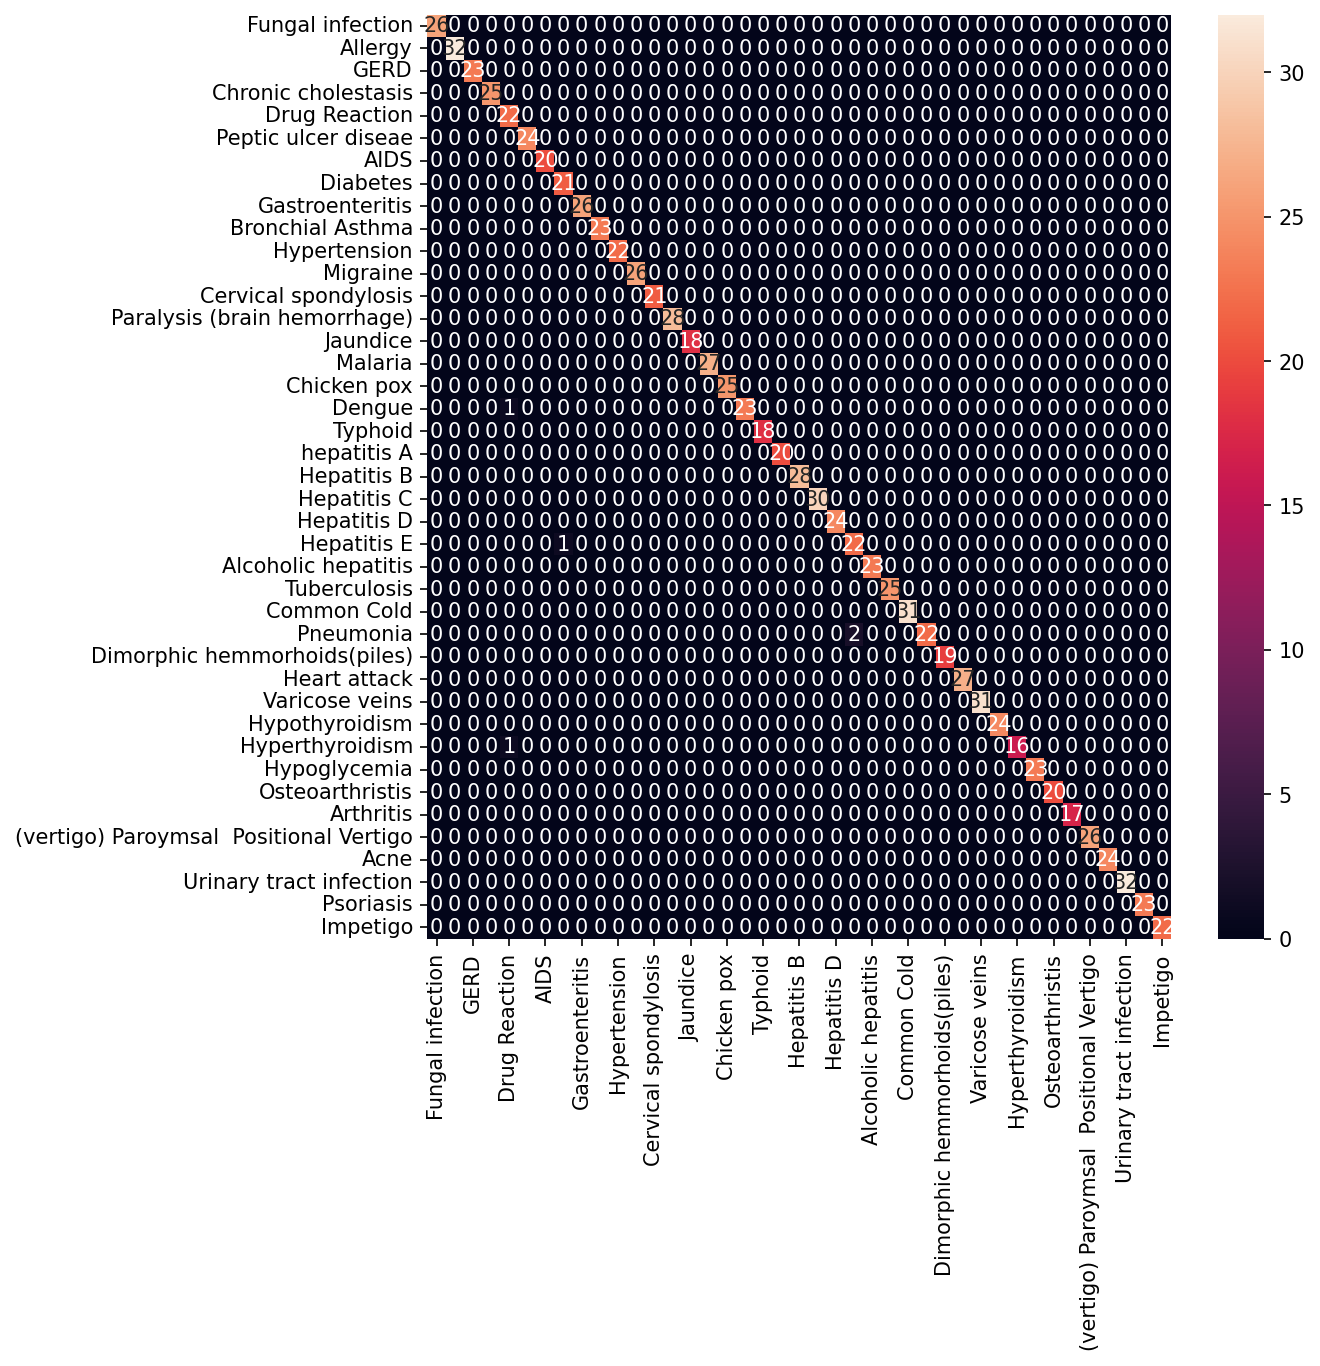

In [23]:
confusion_plot(rf_model, X_test, y_test)

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' contains your features and 'labels' contains the corresponding labels

# Create a DecisionTreeClassifier model (replace this with your model
rf_model = RandomForestClassifier()
# Define the number of folds (k)
k = 20
kf = StratifiedKFold(n_splits=k)

# Perform cross-validation and calculate metrics
accuracy_scores = cross_val_score(rf_model, data, labels, scoring='accuracy', cv=kf)

# Additional metrics with manual calculation
precision_scores = [precision_score(labels[test], rf_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
recall_scores = [recall_score(labels[test], rf_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
f1_scores = [f1_score(labels[test], rf_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
predictions = rf_model.predict(X_test)
# Print the results
print("Accuracy:", np.mean(accuracy_scores) * 100)
print("Precision:", np.nanmean(precision_scores) * 100)  # Use np.nanmean to handle nan values
print("Recall:", np.nanmean(recall_scores) * 100)  # Use np.nanmean to handle nan values
print("F1 Score:", np.nanmean(f1_scores) * 100)  # Use np.nanmean to handle nan values
with open('predictions.txt', 'w') as file:
    for prediction in predictions:
        file.write(str(prediction) + '\n')


Accuracy: 99.51219512195122
Precision: 99.61091753774681
Recall: 99.51219512195122
F1 Score: 99.52098714293835


In [25]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score(rf_model,data,labels, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)
average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")


5-Fold Cross-Validation Scores:
[0.9949187  0.99288618 0.99186992 0.9949187  0.99796748]

Average Cross-Validation Accuracy: 99.45%


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
create_report(knn_model, X_test, y_test)

Accuracy : 99.4919 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        29
                                   AIDS       1.00      1.00      1.00        26
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        21
                                Allergy       0.91      1.00      0.95        21
                              Arthritis       1.00      1.00      1.00        32
                       Bronchial Asthma       1.00      1.00      1.00        31
                   Cervical spondylosis       1.00      0.93      0.96        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

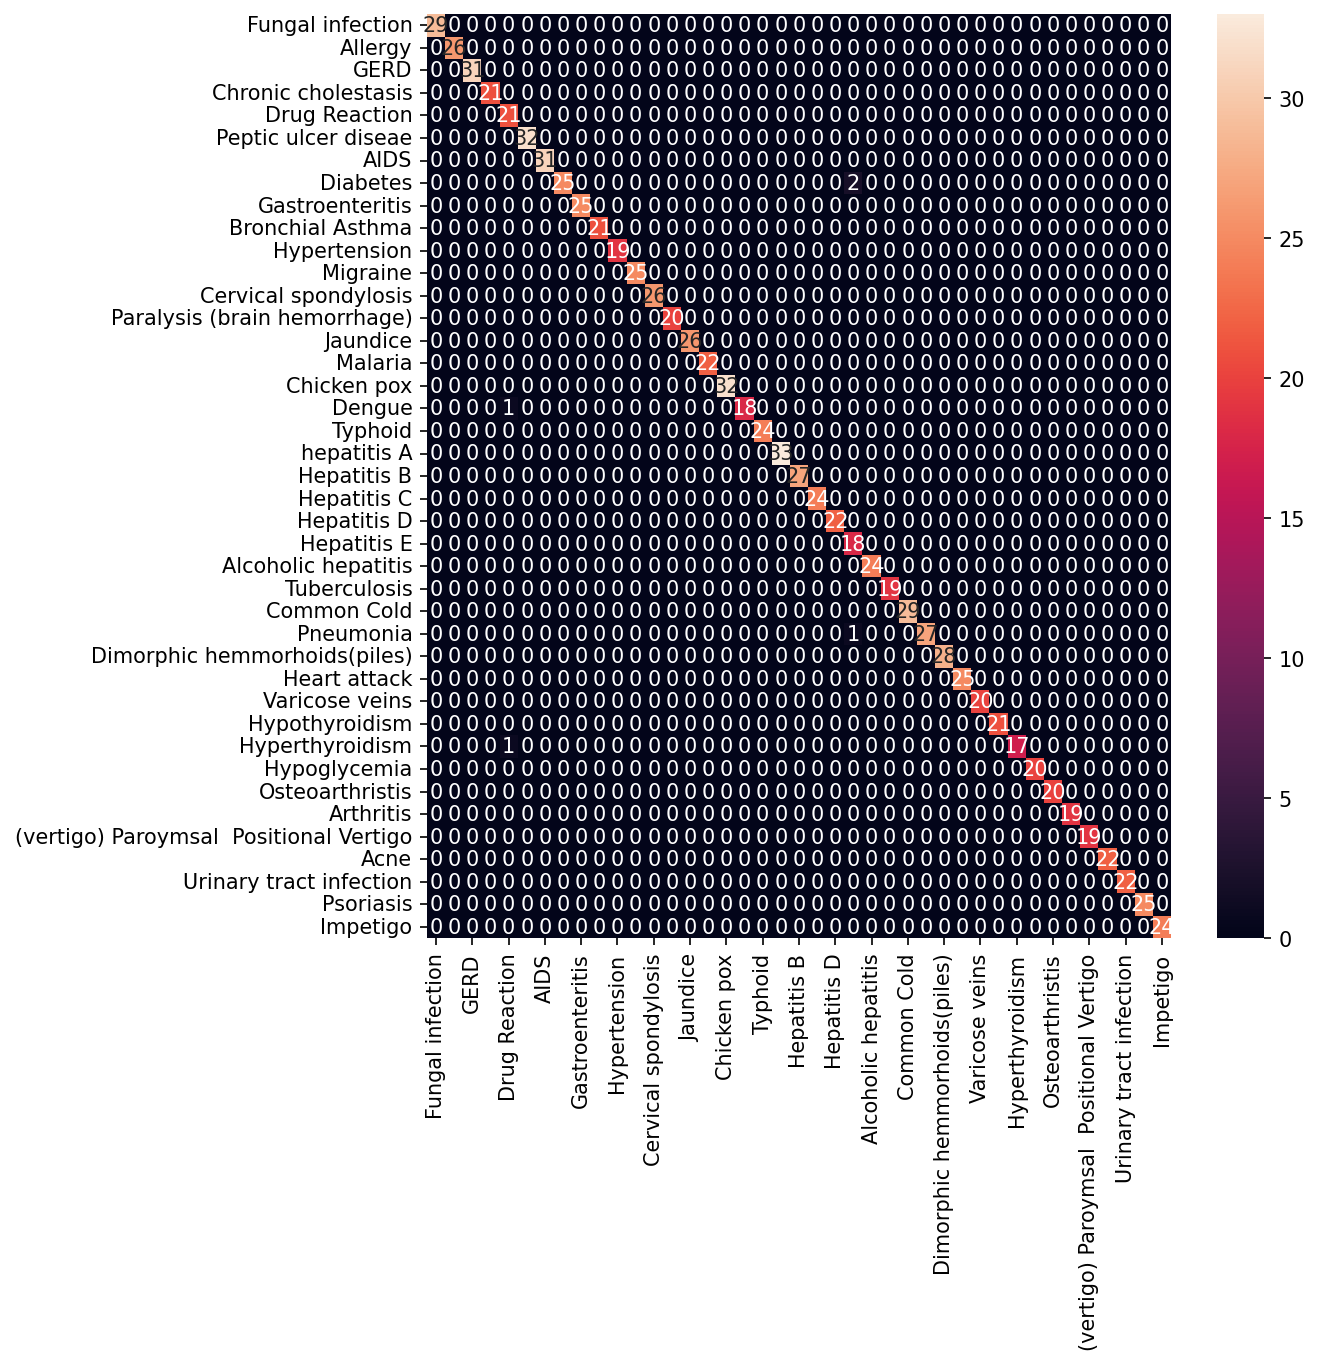

In [ ]:
confusion_plot(knn_model, X_test, y_test)

In [ ]:
#cross validation for knn
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' contains your features and 'labels' contains the corresponding labels

# Create a DecisionTreeClassifier model (replace this with your model
knn_model = KNeighborsClassifier()
# Define the number of folds (k)
k = 20
kf = StratifiedKFold(n_splits=k)

# Perform cross-validation and calculate metrics
accuracy_scores = cross_val_score(knn_model, data, labels, scoring='accuracy', cv=kf)

# Additional metrics with manual calculation
precision_scores = [precision_score(labels[test], knn_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
recall_scores = [recall_score(labels[test], knn_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
f1_scores = [f1_score(labels[test], knn_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]

# Print the results
print("Accuracy:", np.mean(accuracy_scores) * 100)
print("Precision:", np.nanmean(precision_scores) * 100)  # Use np.nanmean to handle nan values
print("Recall:", np.nanmean(recall_scores) * 100)  # Use np.nanmean to handle nan values
print("F1 Score:", np.nanmean(f1_scores) * 100)  # Use np.nanmean to handle nan values


Accuracy: 99.47154471544715
Precision: 99.57317073170732
Recall: 99.47154471544715
F1 Score: 99.47677931824273


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score( knn_model,data,labels, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)
average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")


5-Fold Cross-Validation Scores:
[0.99085366 0.99288618 0.99186992 0.9949187  0.99695122]

Average Cross-Validation Accuracy: 99.35%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
create_report(mnb_model, X_test, y_test)

Accuracy : 65.0407 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.72      0.84        29
                                   AIDS       0.45      0.69      0.55        26
                                   Acne       0.00      0.00      0.00        31
                    Alcoholic hepatitis       0.94      0.71      0.81        21
                                Allergy       0.00      0.00      0.00        21
                              Arthritis       1.00      0.81      0.90        32
                       Bronchial Asthma       0.00      0.00      0.00        31
                   Cervical spondylosis       0.50      0.63      0.56        27
                            Chicken pox       0.69      0.72      0.71        25
                    Chronic cholestasis       0.76      0.90      0.83        21
                            Common Cold       1.00      1.00 

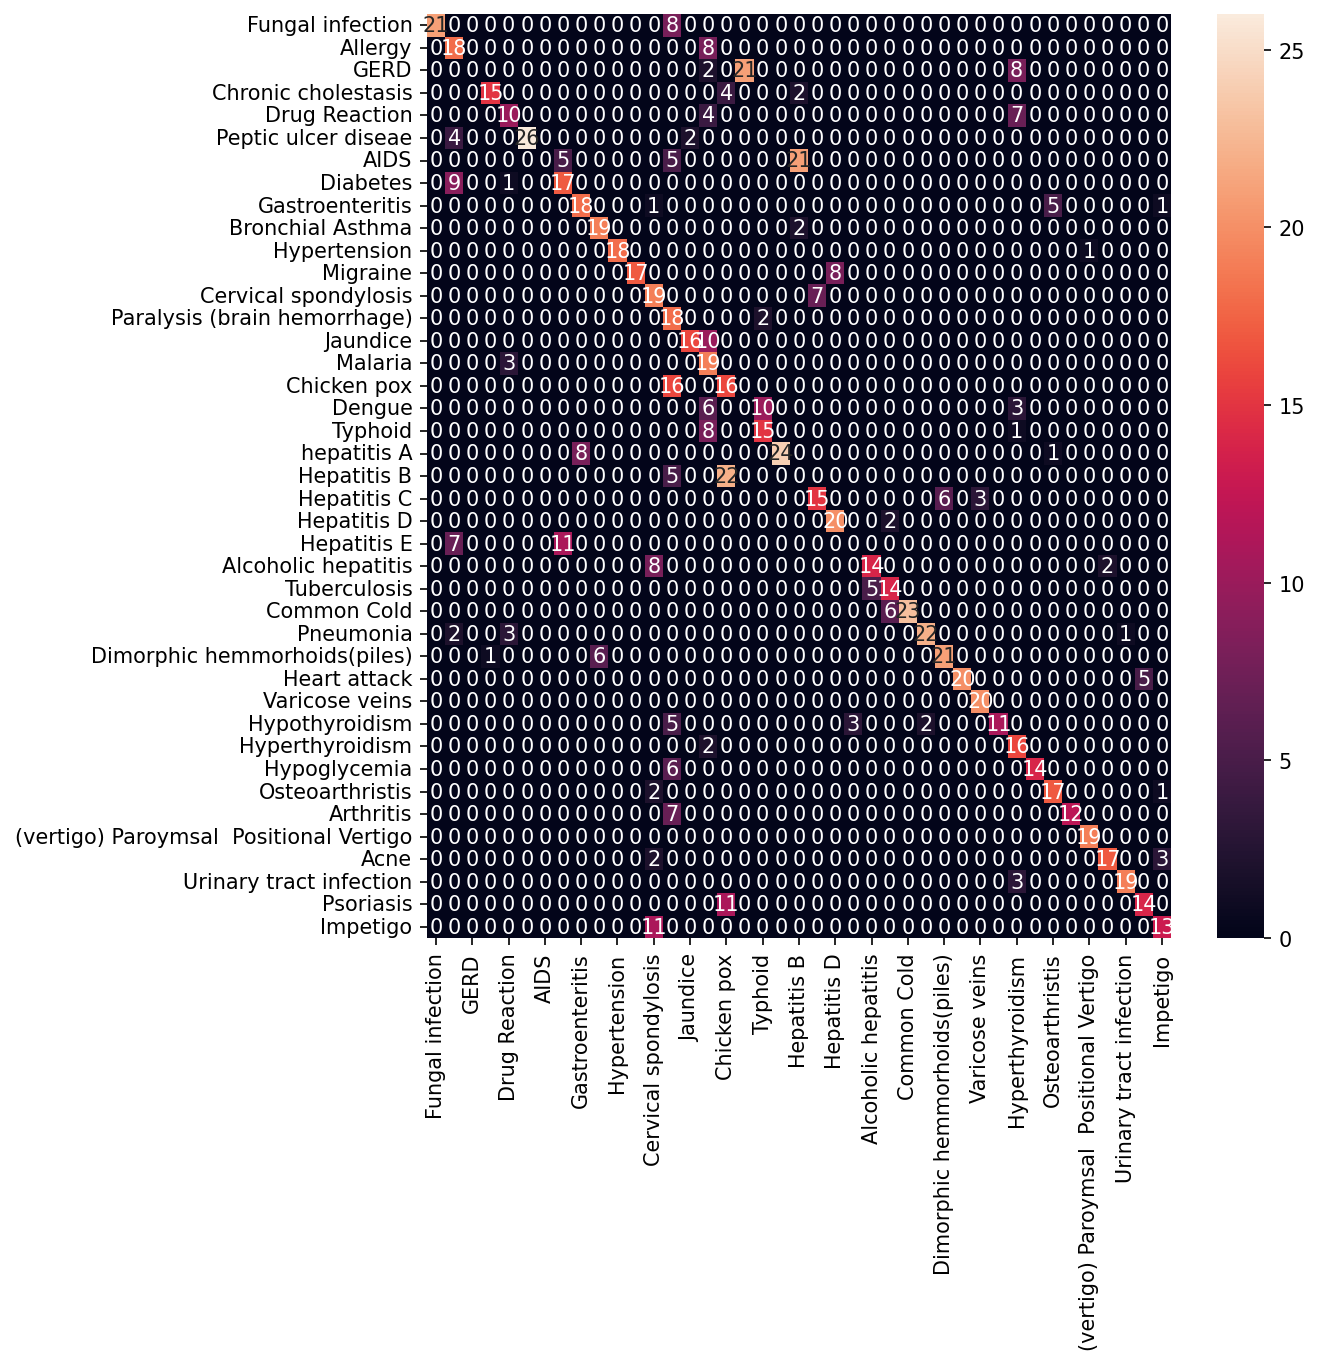

In [ ]:
confusion_plot(mnb_model, X_test, y_test)

In [ ]:
#cross validation for mnb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' contains your features and 'labels' contains the corresponding labels

# Create a DecisionTreeClassifier model (replace this with your model
mnb_model = MultinomialNB()
# Define the number of folds (k)
k = 20
kf = StratifiedKFold(n_splits=k)

# Perform cross-validation and calculate metrics
accuracy_scores = cross_val_score(mnb_model, data, labels, scoring='accuracy', cv=kf)

# Additional metrics with manual calculation
precision_scores = [precision_score(labels[test], mnb_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
recall_scores = [recall_score(labels[test], mnb_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
f1_scores = [f1_score(labels[test], mnb_model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]

# Print the results
print("Accuracy:", np.mean(accuracy_scores) * 100)
print("Precision:", np.nanmean(precision_scores) * 100)  # Use np.nanmean to handle nan values
print("Recall:", np.nanmean(recall_scores) * 100)  # Use np.nanmean to handle nan values
print("F1 Score:", np.nanmean(f1_scores) * 100)  # Use np.nanmean to handle nan values

Accuracy: 60.65040650406503
Precision: 63.40050014549249
Recall: 60.65040650406503
F1 Score: 59.034383084892795


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score( mnb_model,data,labels, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)
average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")


5-Fold Cross-Validation Scores:
[0.60670732 0.63719512 0.60569106 0.63617886 0.62195122]

Average Cross-Validation Accuracy: 62.15%


In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
create_report(model, X_test, y_test)

Accuracy : 98.3740 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.93      0.96        29
                                   AIDS       1.00      1.00      1.00        26
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        21
                                Allergy       0.88      1.00      0.93        21
                              Arthritis       1.00      1.00      1.00        32
                       Bronchial Asthma       0.94      0.97      0.95        31
                   Cervical spondylosis       1.00      0.93      0.96        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

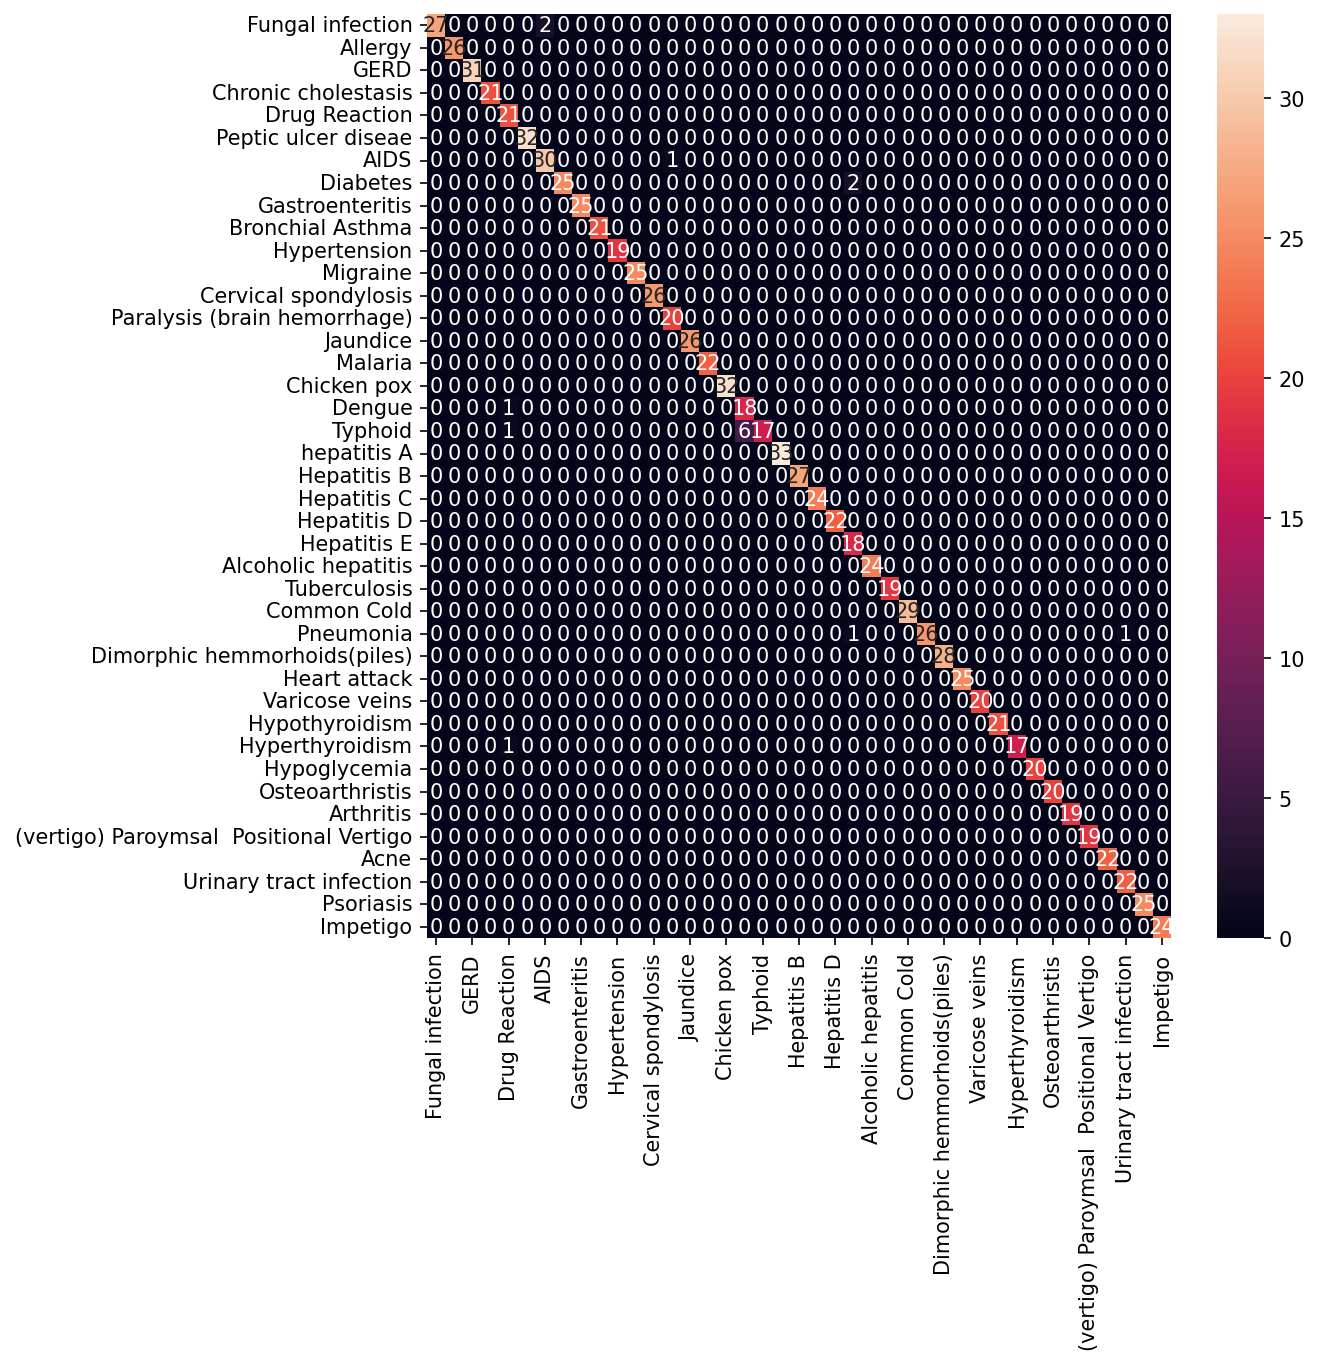

In [ ]:
confusion_plot(model, X_test, y_test)

In [ ]:
#cross validation for mnb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' contains your features and 'labels' contains the corresponding labels

# Create a DecisionTreeClassifier model (replace this with your model
model = svm.SVC(kernel='linear')
# Define the number of folds (k)
k = 20
kf = StratifiedKFold(n_splits=k)

# Perform cross-validation and calculate metrics
accuracy_scores = cross_val_score(model, data, labels, scoring='accuracy', cv=kf)

# Additional metrics with manual calculation
precision_scores = [precision_score(labels[test], model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
recall_scores = [recall_score(labels[test], model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]
f1_scores = [f1_score(labels[test], model.fit(data[train], labels[train]).predict(data[test]), average='weighted') for train, test in kf.split(data, labels)]

# Print the results
print("Accuracy:", np.mean(accuracy_scores) * 100)
print("Precision:", np.nanmean(precision_scores) * 100)  # Use np.nanmean to handle nan values
print("Recall:", np.nanmean(recall_scores) * 100)  # Use np.nanmean to handle nan values
print("F1 Score:", np.nanmean(f1_scores) * 100)  # Use np.nanmean to handle nan values

Accuracy: 98.41463414634146
Precision: 98.72096399535423
Recall: 98.41463414634146
F1 Score: 98.36707195243781


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score(model,data,labels, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)
average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")


5-Fold Cross-Validation Scores:
[0.98170732 0.98069106 0.9847561  0.9847561  0.9847561 ]

Average Cross-Validation Accuracy: 98.33%


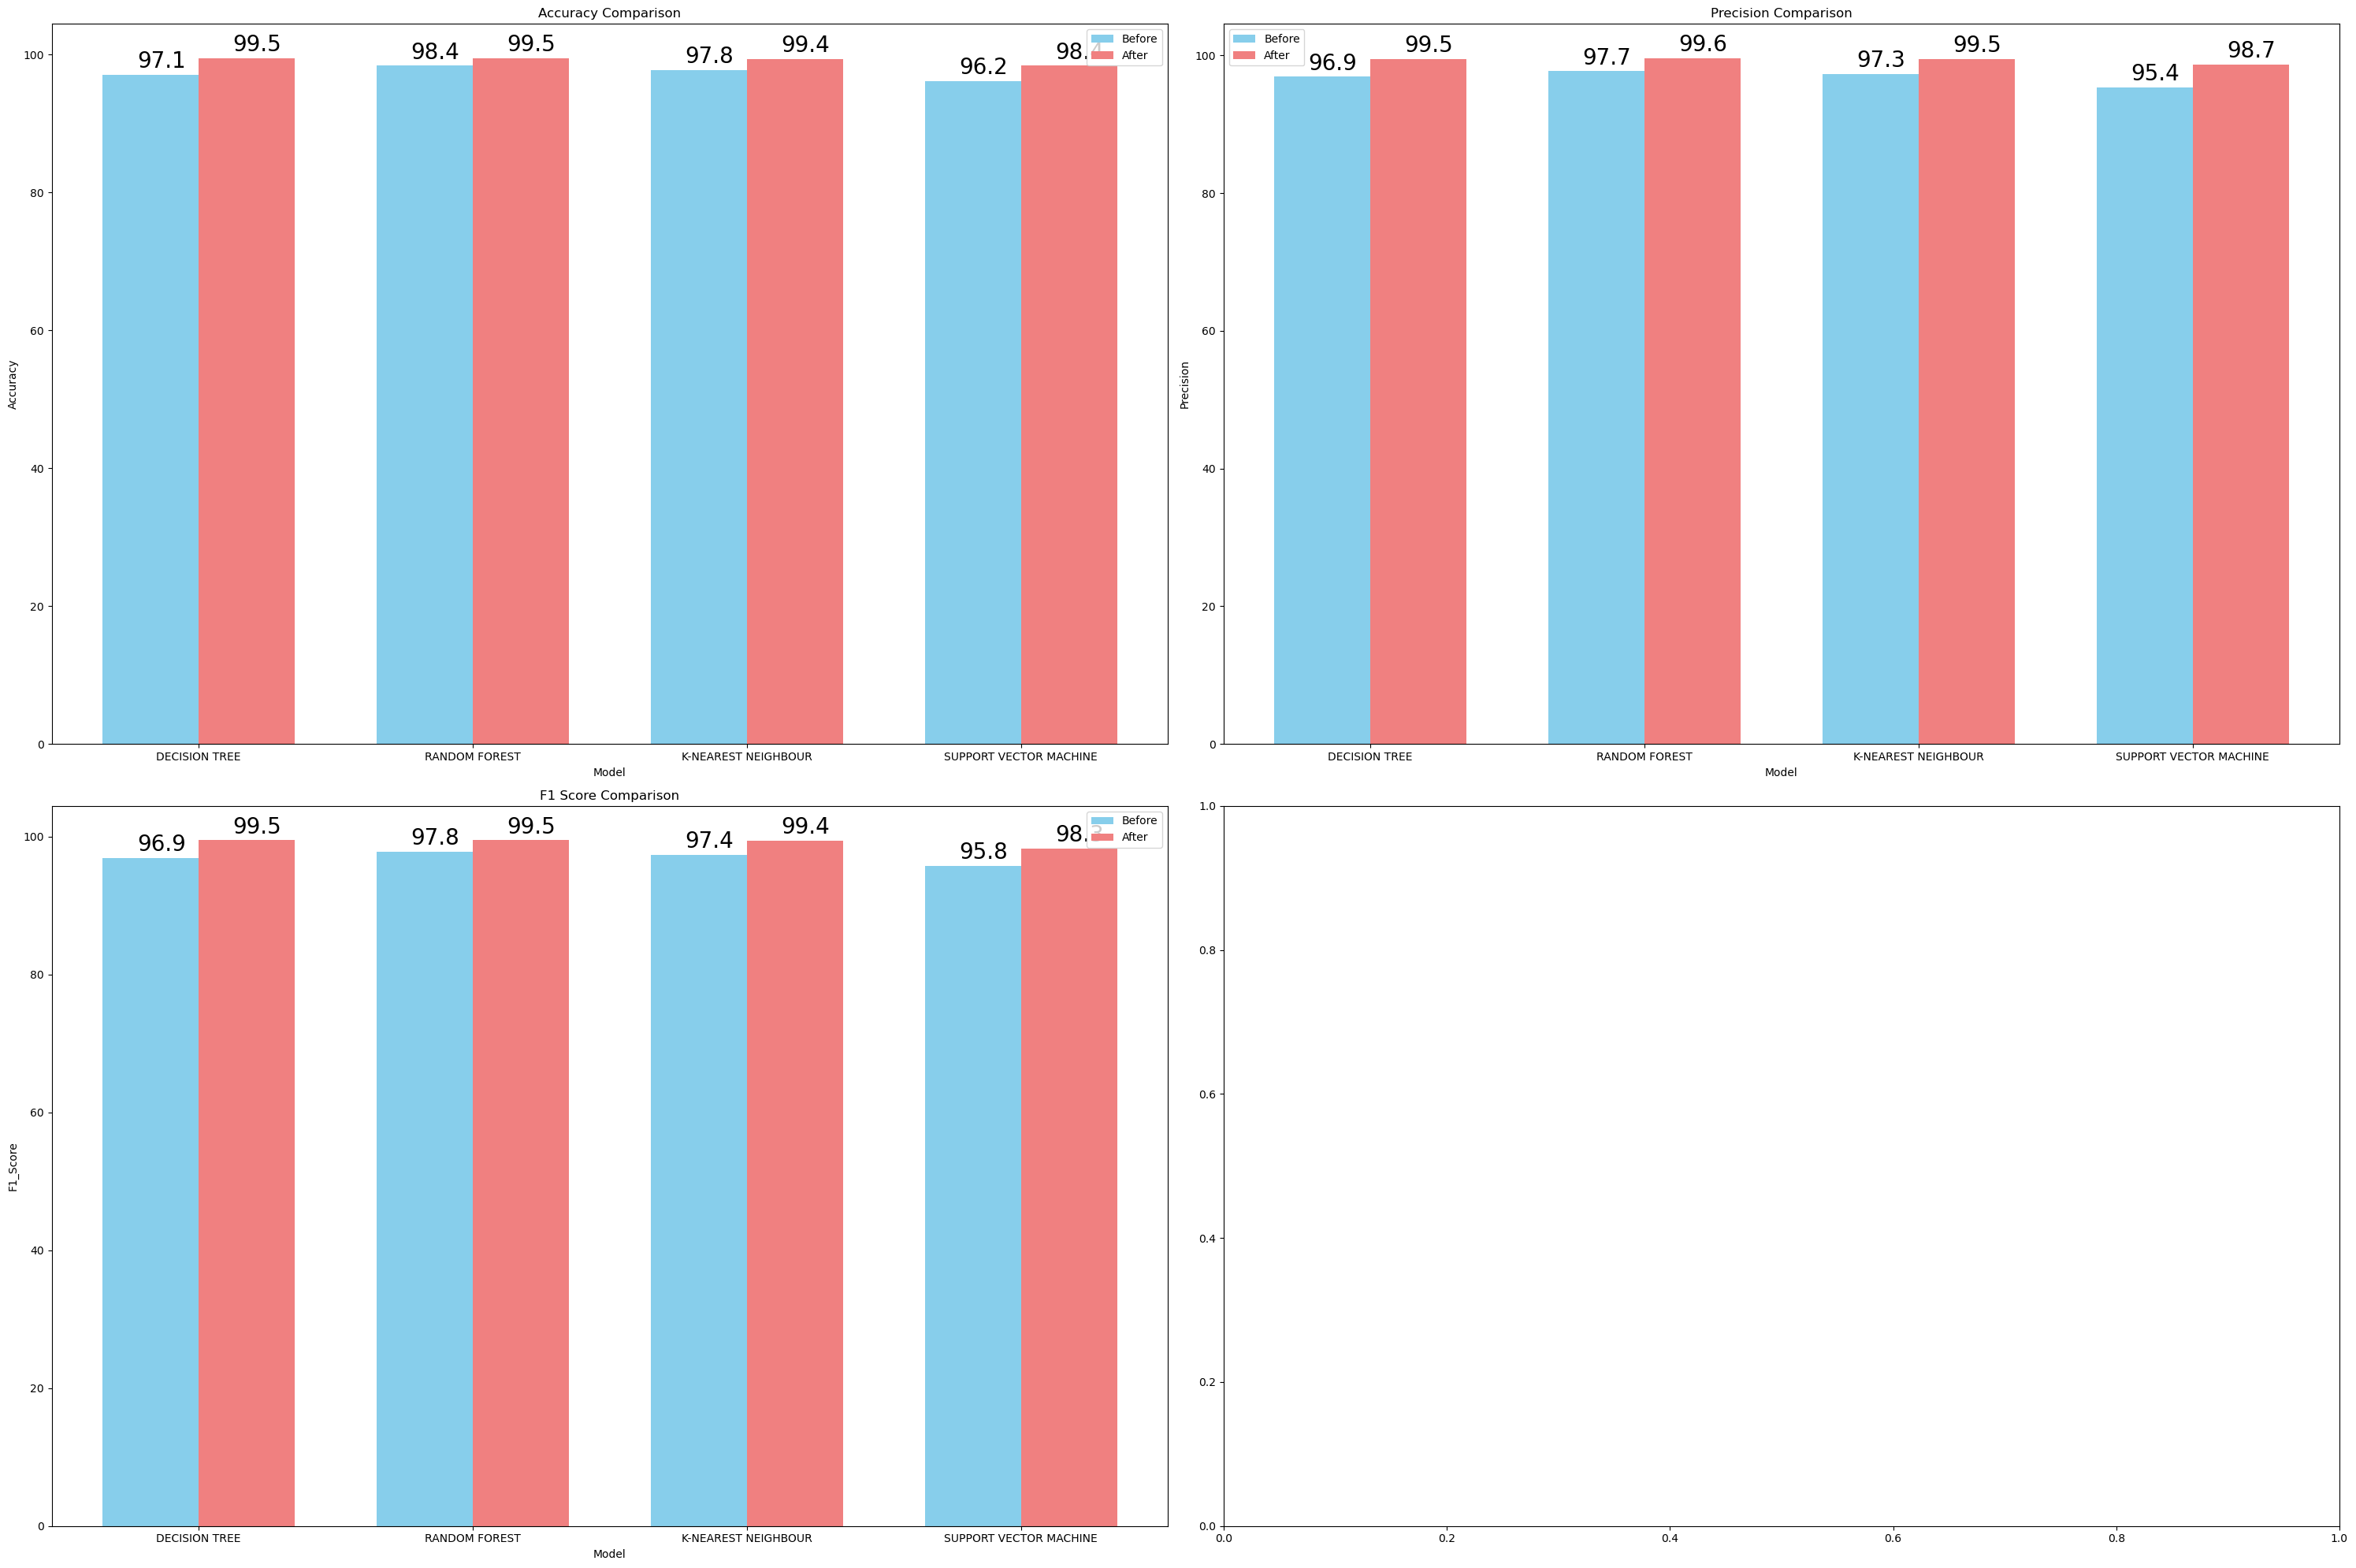

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Data for the before and after scenarios
data_before = {

    'Model': ['DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE'],
    'Accuracy': [97.1,98.4,97.8,96.2],
    'Precision': [96.9, 97.7,97.3,95.4],
    'F1_Score': [96.9, 97.8, 97.4, 95.8]
}

data_after = {
    'Model': ['DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE'],
    'Accuracy': [99.5, 99.5, 99.4, 98.4],
    'Precision': [99.5, 99.6, 99.5, 98.7],
    'F1_Score': [99.5, 99.5, 99.4, 98.3]
}

# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.35

    ax.bar(index, before_values, width=bar_width, label='Before', color='skyblue')
    ax.bar(index + bar_width, after_values, width=bar_width, label='After', color='lightcoral')

    for i in range(len(models)):
        ax.text(index[i] - 0.05, before_values[i] + 1, f'{before_values[i]:.1f}', fontsize=20)
        ax.text(index[i] + bar_width - 0.05, after_values[i] + 1, f'{after_values[i]:.1f}', fontsize=20)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes[0, 0], 'Accuracy', 'Accuracy Comparison')
plot_bargraph(axes[0, 1], 'Precision', 'Precision Comparison')
plot_bargraph(axes[1, 0], 'F1_Score', 'F1 Score Comparison')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [27]:
import joblib
import pandas as pd

# Assuming you have a function to preprocess input data
def preprocess_input(symptoms_str, all_symptoms):
    # Create a DataFrame with all symptoms as columns
    symptoms_df = pd.DataFrame(columns=all_symptoms)
    
    # Add a row with zeros
    symptoms_df.loc[0] = 0
    
    # Set the corresponding symptoms to 1 based on the input
    for symptom in symptoms_str.split(','):
        symptoms_df.at[0, symptom] = 1
    
    return symptoms_df.values

# Save the model
joblib.dump(rf_model, "mymodel.pkl")

# Load the model
model = joblib.load("mymodel.pkl")

# Example symptoms string
input_symptoms = "itching,skin_rash,nodal_skin_eruptions,dischromic_patches"


# List of all possible symptoms (replace with your actual list)
all_symptoms = ["itching", "skin_rash", "nodal_skin_eruptions", "dischromic_patches","0","0","0","0","0","0","0","0","0","0","0","0","0"]

# Preprocess the input
processed_input = preprocess_input(input_symptoms,all_symptoms)

# Make a prediction
prediction = model.predict(processed_input)[0]

print(" predicted Disease:", prediction)


 predicted Disease: Fungal infection


In [30]:
import joblib
joblib.dump(rf_model,"mymodel.pkl")
model=joblib.load("mymodel.pkl")
#model.predict([["itching", "skin_rash", "nodal_skin_eruptions", "dischromic_patches","0","0","0","0","0","0","0","0","0","0","0","0","0"]])